In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from requirements import load_hindi_dataset

### Loading Hindi Dataset

In [3]:
datasetPath = "./requirements/data2.csv"
(hindiData, hindiLabels) = load_hindi_dataset.load_hindi_data(datasetPath)

In [4]:
import cv2

In [5]:
train_x, test_x, train_y, test_y = train_test_split(hindiData, hindiLabels, test_size = 0.2)

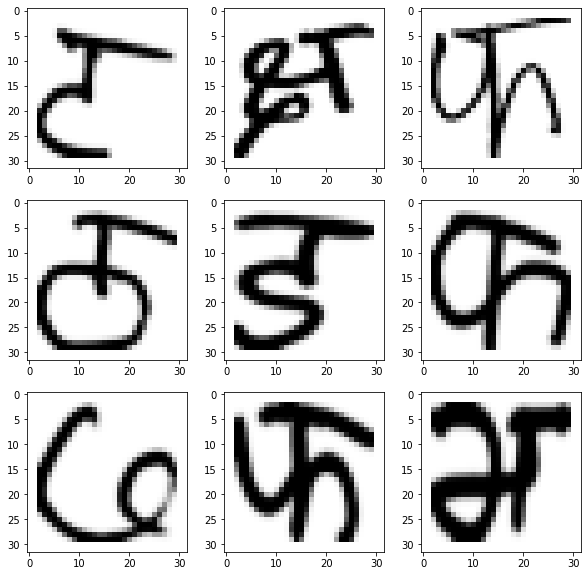

In [6]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (32,32)), cmap="Greys")
plt.show()

In [7]:
word_dict = {0:'क',1:'ख',2:'ग',3:'घ',4:'ड़',5:'च',6:'छ',7:'ज',8:'झ',9:'ञ',10:'ट',11:'ठ',12:'ड',13:'ढ',14:'ण',15:'त',16:'थ',17:'द',18:'ध',19:'न',20:'प',21:'फ',22:'ब',23:'भ', 24:'म',25:'य',26:'र',27:'ल',28:'व',29:'श',30:'ष',31:'स',32:'ह',33:'क्ष',34:'त्र',35:'ज्ञ',36:'०',37:'१',38:'२',39:'३',40:'४',41:'५',42:'६',43:'७',44:'८',45:'९'}

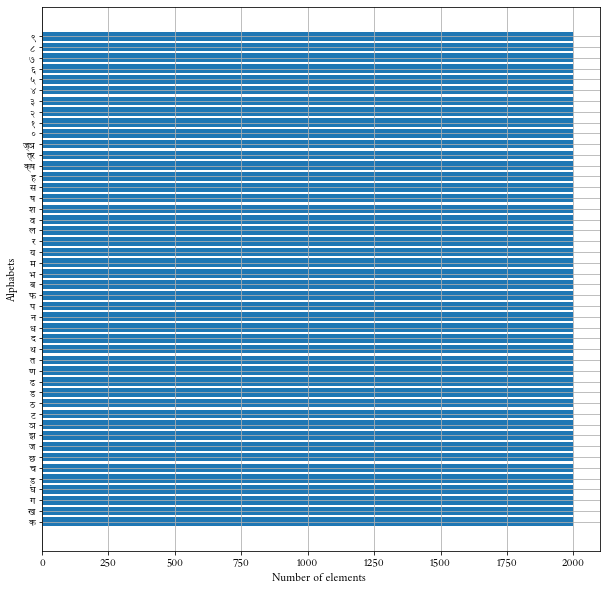

In [14]:
import matplotlib

matplotlib.rcParams['font.family'] = 'Sanskrit Text'

train_yint = np.int0(hindiLabels)
count = np.zeros(46, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

In [15]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)

New shape of train data:  (73600, 32, 32, 1)
New shape of test data:  (18400, 32, 32, 1)


In [16]:
train_yOHE = to_categorical(train_y, num_classes = 46)
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 46)
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (73600, 46)
New shape of test labels:  (18400, 46)


Epoch 1/15
2300/2300 [==============================] - 92s 40ms/step - loss: 1.1575 - accuracy: 0.6682 - val_loss: 0.2510 - val_accuracy: 0.9243 - lr: 0.0010
Epoch 2/15
2300/2300 [==============================] - 94s 41ms/step - loss: 0.1829 - accuracy: 0.9457 - val_loss: 0.1584 - val_accuracy: 0.9547 - lr: 0.0010
Epoch 3/15
2300/2300 [==============================] - 100s 44ms/step - loss: 0.1328 - accuracy: 0.9612 - val_loss: 0.1271 - val_accuracy: 0.9647 - lr: 0.0010
Epoch 4/15
2300/2300 [==============================] - 104s 45ms/step - loss: 0.1089 - accuracy: 0.9680 - val_loss: 0.1976 - val_accuracy: 0.9472 - lr: 0.0010
Epoch 5/15
2300/2300 [==============================] - 104s 45ms/step - loss: 0.0322 - accuracy: 0.9905 - val_loss: 0.0683 - val_accuracy: 0.9816 - lr: 2.0000e-04
Epoch 6/15
2300/2300 [==============================] - 102s 44ms/step - loss: 0.0135 - accuracy: 0.9960 - val_loss: 0.0727 - val_accuracy: 0.9830 - lr: 2.0000e-04
Epoch 7/15
2300/2300 [============

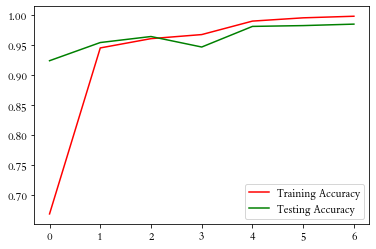

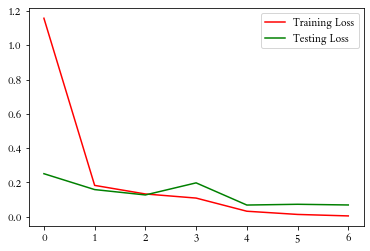

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))



model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=1))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))
model.add(Dense(46,activation ="softmax"))



model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history = model.fit(train_X, train_yOHE, epochs=15, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))

accu=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

model.summary()
model.save(r'charModel.h5')

In [18]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9242934584617615, 0.9546738862991333, 0.9647282361984253, 0.9471738934516907, 0.9816304445266724, 0.9829891324043274, 0.9854347705841064]
The training accuracy is : [0.6682336926460266, 0.945652186870575, 0.9611820578575134, 0.9679755568504333, 0.99048912525177, 0.9959646463394165, 0.9986141324043274]
The validation loss is : [0.2510204315185547, 0.15842482447624207, 0.1271454393863678, 0.1975933164358139, 0.06828347593545914, 0.07268362492322922, 0.06869611144065857]
The training loss is : [1.1574952602386475, 0.1829143911600113, 0.13282990455627441, 0.10890992730855942, 0.03221142292022705, 0.0135163813829422, 0.004871402867138386]


In [19]:
pred = model.predict(test_X[:9])
print(test_X.shape)

1/1 [==============================] - 0s 106ms/step
(18400, 32, 32, 1)


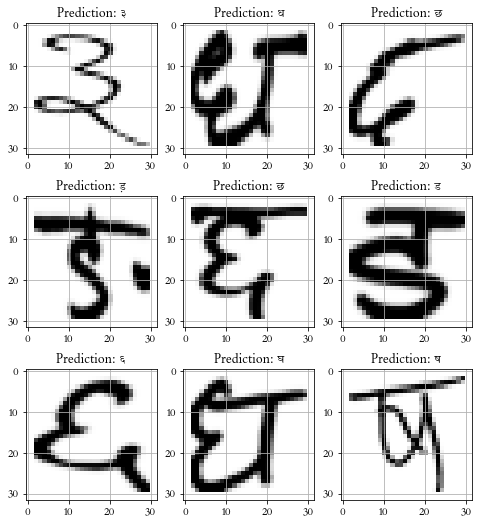

In [20]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (32,32))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()